In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("../log.ndjson", lines = True)
df = df.sort_values(by=["value_type","entry_count", "shrink_type"])
df.to_markdown("../this.md")
df

,entry_count,value_type,collection,capacity,ram_usage,shrink_type
9,0,BigStruct,hashmap,0.0,1077,AfterShrink
21,0,BigStruct,vector,0.0,1077,AfterShrink
27,0,BigStruct,vector_deque,1.0,1509,AfterShrink
2,0,BigStruct,nothing,NaN,1077,BeforeShrink
8,0,BigStruct,hashmap,0.0,1077,BeforeShrink
...,...,...,...,...,...,...
4596,16129,EmptyStruct,vector_deque,16383.0,132149,BeforeShrink
4602,16129,EmptyStruct,linked_list,NaN,388173,BeforeShrink
4573,16129,EmptyStruct,nothing,NaN,1077,None
4585,16129,EmptyStruct,btreemap,NaN,317293,None


/tmp/ipykernel_4935/3854500408.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = df[df.collection == i][df.value_type == val_type]


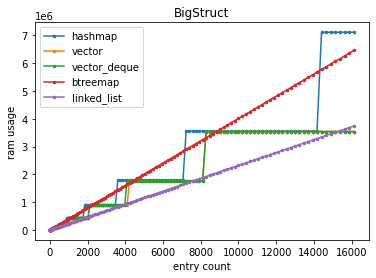

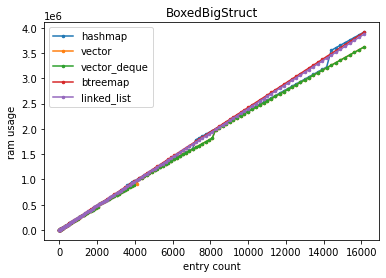

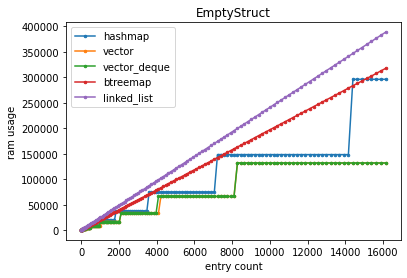

In [9]:
def show_plot(val_type, shrink_type):
    for i in df.collection.unique():
        if i == "nothing": 
            continue

        _df = df[df.collection == i][df.value_type == val_type]
        for i2 in shrink_type:
            _df = _df[i2 == _df.shrink_type]

        if len(_df.entry_count) == 0:
            continue
        
        plt.plot(_df.entry_count, _df.ram_usage, label=i, markersize = 5, marker=".")
        plt.xlabel("entry count")
        plt.ylabel("ram usage")
        plt.legend()

    plt.title(val_type)
    plt.show()
    return

for i in df.value_type.unique():
    show_plot(i, ["BeforeShrink"])

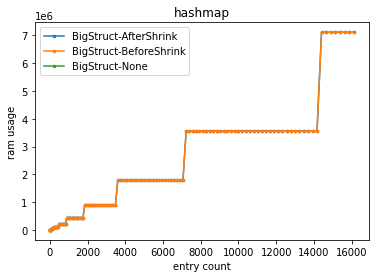

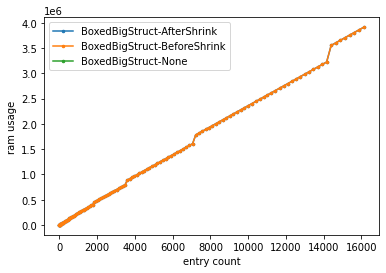

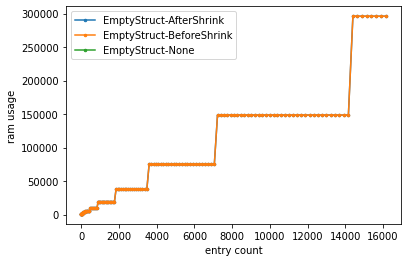

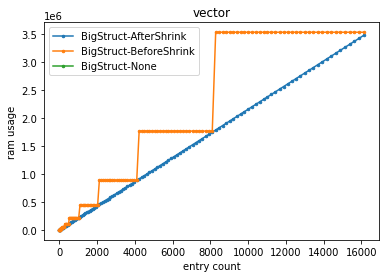

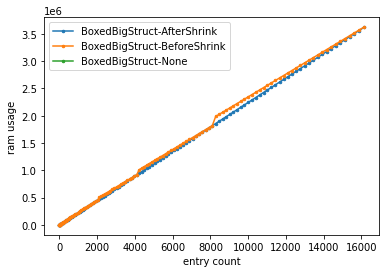

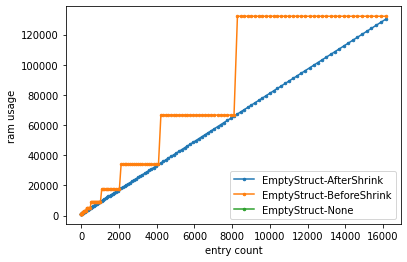

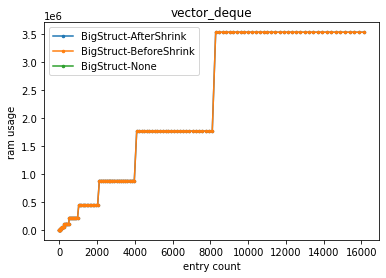

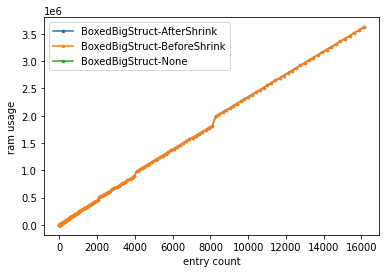

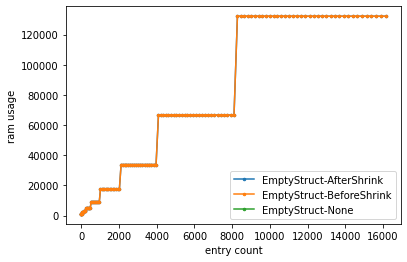

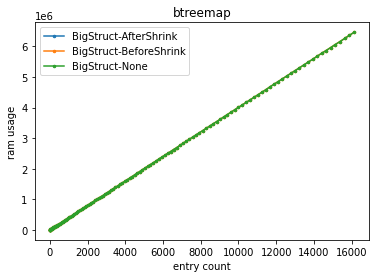

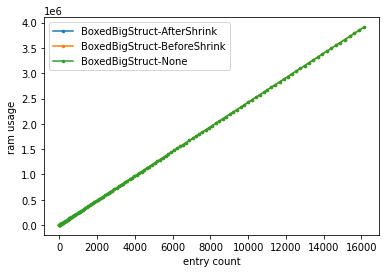

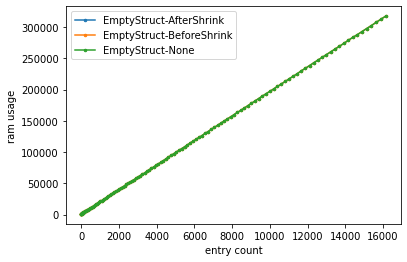

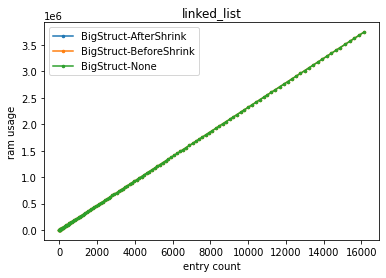

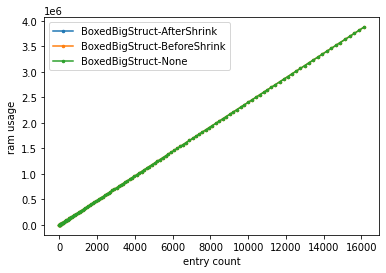

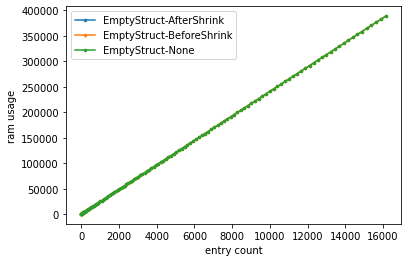

In [5]:
def show_plot_per_collection(collection, shrink_type):
    plt.title(collection)
    
    for i in df.value_type.unique():
        for s in df.shrink_type.unique():
            _df = df[df.collection == collection]
            _df = _df[_df.value_type == i]
            _df = _df[_df.shrink_type == s]
            plt.plot(_df.entry_count, _df.ram_usage, label=f"{i}-{s}", markersize = 5, marker=".")
            plt.xlabel("entry count")
            plt.ylabel("ram usage")
            plt.legend()

        plt.show()

for i in df.collection.unique():
    if i == "nothing":
        continue
    show_plot_per_collection(i, ["BeforeShrink"])